In [1]:
# ---- DECISION TREE REGRESSOR ---- #
# Import important libraries
import pandas as pd
import numpy as np

In [2]:
# Path of the file
path="F:/Jitendra/IPBA/Training/Machine Learning/Decision Tree/dm.csv"

In [3]:
# Read the data into data frame
dm=pd.read_csv(path)

In [4]:
# Check the data
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [5]:
dm.describe()

,Salary,Children,Catalogs,AmountSpent,Cust_Id
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000,643.930000
std,30616.314826,1.05107,6.622895,961.068613,369.047166
min,10100.000000,0.00000,6.000000,38.000000,12.000000
25%,29975.000000,0.00000,6.000000,488.250000,316.750000
50%,53700.000000,1.00000,12.000000,962.000000,636.000000
75%,77025.000000,2.00000,18.000000,1688.500000,955.500000
max,168800.000000,3.00000,24.000000,6217.000000,1297.000000


In [6]:
# Check missing
dm.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [7]:
# Fill history column having missing values with New Cust
dm['History']=dm['History'].fillna("NewCust")

In [8]:
# Target variable
y=dm['AmountSpent'].values

In [9]:
# X dataframe
dm_model=dm.drop(['Cust_Id','AmountSpent'],axis=1)

In [10]:
dm_model.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6


In [11]:
# Get dummies
dm_model=pd.get_dummies(dm_model)

In [12]:
dm_model.head(2)

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_NewCust
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0


In [13]:
# X dataframe with dummies
X=dm_model.values

In [14]:
# Import train test split module
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [16]:
##### Build the tree model ######
from sklearn import tree

In [17]:
# Create regression tree object
reg=tree.DecisionTreeRegressor(max_depth=3)

In [18]:
# Fit the model on tarin data
reg=reg.fit(X_train,y_train)

In [19]:
#Import plotting library
import matplotlib.pyplot as plt
%matplotlib inline

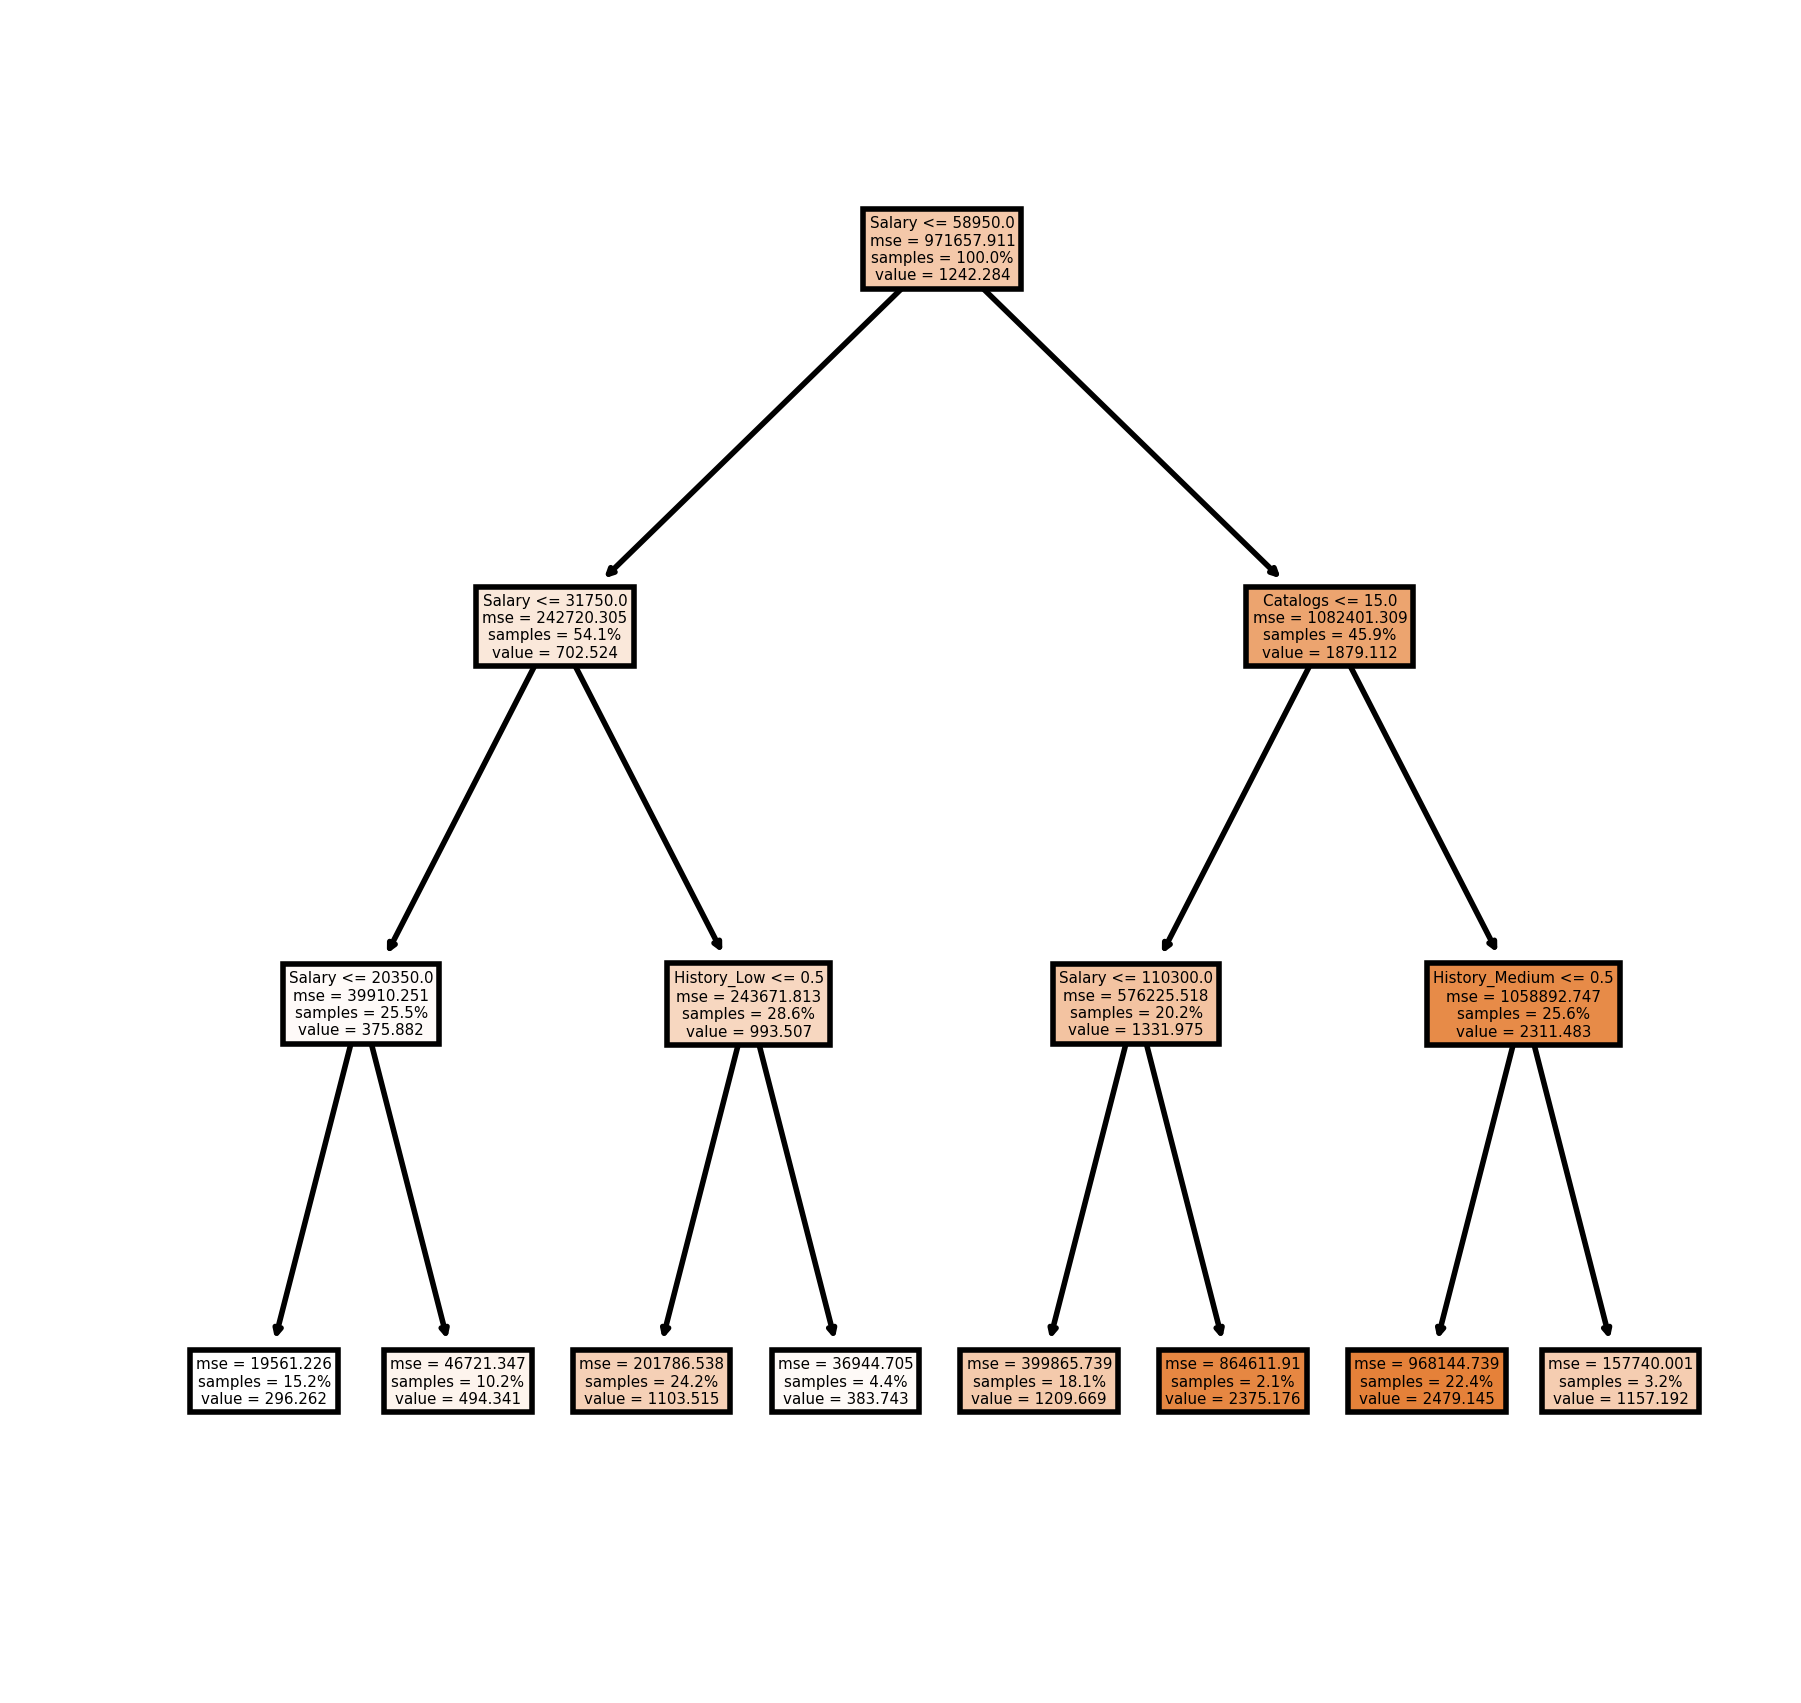

In [20]:
# Plot the tree
plt.figure(figsize=(5,5),dpi=400)
tree.plot_tree(reg,feature_names=dm_model.columns.tolist(),\
              filled=True,proportion=True)
plt.show()

In [ ]:
### Extract the rules
## Rule 1
## Salary<=20350, then avg amnt spent=296
## Rule 2
## 20350<Salary<=31750, then avg amnt spent=495
## Rule 3
## 31750<Salary<=58950 and Purchase History is not low, avg amount spent is 1103
## Rule 4
## 31750<Salary<=58950 and Purchase History is  low, avg amount spent is 383
## Rule 5
## 58950<Salary<=110300, Catalogs<=15, then avg amount spent is 1209
## Rule 6
## Salary>110300,Catalogs<=15, then avg amount spent is 2375 
## Rule 7
## Salary>58950, Catalogs>15 Purchase History is not Medium, then avg amount spent is 2479
## Rule 8
## Salary>58950, Catalogs>15 Purchase History is Medium, then avg amount spent is 1157

In [21]:
# Predictions
reg.predict(X_test)[0:10]

array([ 494.34146341,  494.34146341,  383.74285714,  296.26229508,
       1103.51546392,  296.26229508,  494.34146341, 1103.51546392,
       2479.1452514 ,  494.34146341])

In [22]:
reg.score(X_train, y_train)

0.6182615394405964

In [23]:
# Feature importances
feat_imp = reg.feature_importances_
print(feat_imp)

[0.70483259 0.         0.18065203 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03196313 0.08255225 0.        ]


In [24]:
# Check columns
dm_model.columns

Index(['Salary', 'Children', 'Catalogs', 'Age_Middle', 'Age_Old', 'Age_Young',
       'Gender_Female', 'Gender_Male', 'OwnHome_Own', 'OwnHome_Rent',
       'Married_Married', 'Married_Single', 'Location_Close', 'Location_Far',
       'History_High', 'History_Low', 'History_Medium', 'History_NewCust'],
      dtype='object')

In [25]:
# Make a series object to get columns and feature importances
pd.Series(reg.feature_importances_,index=dm_model.columns).sort_values(ascending=False).head(10)

Salary            0.704833
Catalogs          0.180652
History_Medium    0.082552
History_Low       0.031963
Gender_Male       0.000000
Children          0.000000
Age_Middle        0.000000
Age_Old           0.000000
Age_Young         0.000000
Gender_Female     0.000000
dtype: float64

In [26]:
from sklearn import metrics
import numpy as np
y_pred = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 407.20624786517396
Mean Squared Error: 301337.3335767558
Root Mean Squared Error: 548.9420129455896


In [ ]:
# Try to tune the hyperparameter of regression tree 
# Is there a tree exist, which with a lesser depth can reduce MSE value 

# Grid Search cross validation to find the best hyper-parameter 
# Pruning of tree can improve the accuracy ? Please check that 

# It is a great tool for feature engineering 
